<a href="https://colab.research.google.com/github/Rohil72/ML_LAB/blob/main/MLlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To perform linear regression with Regularization


In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Features and target
X = wine_quality.data.features
y = wine_quality.data.targets

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

# Rename target column (assuming it's named something generic, rename to 'quality')
df.rename(columns={df.columns[-1]: 'quality'}, inplace=True)

# Show the first few rows
print(df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

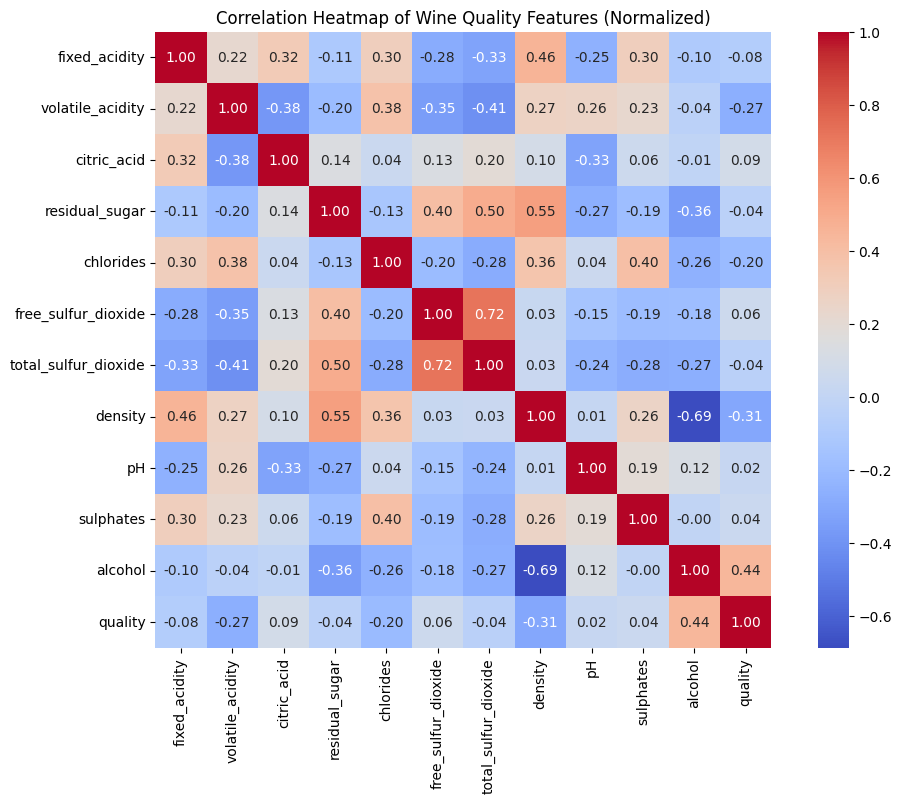

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Optional: Normalize features
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Wine Quality Features (Normalized)")
plt.show()


In [ ]:
# Drop specified irrelevant features from X
X = X.drop(columns=['residual_sugar', 'total_sulfur_dioxide', 'pH', 'sulphates'])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score




# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)




# 5. Fit Elastic Net regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.2, random_state=42)
elastic_net.fit(X_train, y_train)

# 6. Evaluate performance
y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {elastic_net.coef_}")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")


Coefficients: [-0.         -0.          0.         -0.          0.0040227  -0.
  0.12827994]
MSE: 0.635
R²: 0.130


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your dataframes/arrays (after dropping columns etc.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grid of hyperparameters to try
alphas = np.logspace(-3, 1, 10)  # from 0.001 to 10
l1_ratios = np.linspace(0, 1, 6)  # 0 (Ridge) to 1 (Lasso)

best_mse = float('inf')
best_alpha = None
best_l1_ratio = None

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"alpha: {alpha:.4f}, l1_ratio: {l1_ratio:.2f}, MSE: {mse:.4f}")

        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print(f"\nBest params - alpha: {best_alpha}, l1_ratio: {best_l1_ratio}, MSE: {best_mse:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0010, l1_ratio: 0.00, MSE: 0.5454
alpha: 0.0010, l1_ratio: 0.20, MSE: 0.5453
alpha: 0.0010, l1_ratio: 0.40, MSE: 0.5452
alpha: 0.0010, l1_ratio: 0.60, MSE: 0.5452
alpha: 0.0010, l1_ratio: 0.80, MSE: 0.5452
alpha: 0.0010, l1_ratio: 1.00, MSE: 0.5452


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0028, l1_ratio: 0.00, MSE: 0.5454
alpha: 0.0028, l1_ratio: 0.20, MSE: 0.5453
alpha: 0.0028, l1_ratio: 0.40, MSE: 0.5453
alpha: 0.0028, l1_ratio: 0.60, MSE: 0.5453
alpha: 0.0028, l1_ratio: 0.80, MSE: 0.5452
alpha: 0.0028, l1_ratio: 1.00, MSE: 0.5452


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0077, l1_ratio: 0.00, MSE: 0.5469
alpha: 0.0077, l1_ratio: 0.20, MSE: 0.5468
alpha: 0.0077, l1_ratio: 0.40, MSE: 0.5467
alpha: 0.0077, l1_ratio: 0.60, MSE: 0.5466
alpha: 0.0077, l1_ratio: 0.80, MSE: 0.5466
alpha: 0.0077, l1_ratio: 1.00, MSE: 0.5465


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0215, l1_ratio: 0.00, MSE: 0.5525
alpha: 0.0215, l1_ratio: 0.20, MSE: 0.5533
alpha: 0.0215, l1_ratio: 0.40, MSE: 0.5545
alpha: 0.0215, l1_ratio: 0.60, MSE: 0.5563
alpha: 0.0215, l1_ratio: 0.80, MSE: 0.5590
alpha: 0.0215, l1_ratio: 1.00, MSE: 0.5636


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0599, l1_ratio: 0.00, MSE: 0.5621
alpha: 0.0599, l1_ratio: 0.20, MSE: 0.5670
alpha: 0.0599, l1_ratio: 0.40, MSE: 0.5749
alpha: 0.0599, l1_ratio: 0.60, MSE: 0.5795
alpha: 0.0599, l1_ratio: 0.80, MSE: 0.5798
alpha: 0.0599, l1_ratio: 1.00, MSE: 0.5801


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.1668, l1_ratio: 0.00, MSE: 0.5714
alpha: 0.1668, l1_ratio: 0.20, MSE: 0.5810
alpha: 0.1668, l1_ratio: 0.40, MSE: 0.5828
alpha: 0.1668, l1_ratio: 0.60, MSE: 0.5855
alpha: 0.1668, l1_ratio: 0.80, MSE: 0.5891
alpha: 0.1668, l1_ratio: 1.00, MSE: 0.5938


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.4642, l1_ratio: 0.00, MSE: 0.5823
alpha: 0.4642, l1_ratio: 0.20, MSE: 0.5955
alpha: 0.4642, l1_ratio: 0.40, MSE: 0.6112
alpha: 0.4642, l1_ratio: 0.60, MSE: 0.6352
alpha: 0.4642, l1_ratio: 0.80, MSE: 0.6702
alpha: 0.4642, l1_ratio: 1.00, MSE: 0.7202


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.559e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 1.2915, l1_ratio: 0.00, MSE: 0.6083
alpha: 1.2915, l1_ratio: 0.20, MSE: 0.6572
alpha: 1.2915, l1_ratio: 0.40, MSE: 0.7284
alpha: 1.2915, l1_ratio: 0.60, MSE: 0.7290
alpha: 1.2915, l1_ratio: 0.80, MSE: 0.7297
alpha: 1.2915, l1_ratio: 1.00, MSE: 0.7297


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 3.5938, l1_ratio: 0.00, MSE: 0.6526
alpha: 3.5938, l1_ratio: 0.20, MSE: 0.7289
alpha: 3.5938, l1_ratio: 0.40, MSE: 0.7297
alpha: 3.5938, l1_ratio: 0.60, MSE: 0.7297
alpha: 3.5938, l1_ratio: 0.80, MSE: 0.7297
alpha: 3.5938, l1_ratio: 1.00, MSE: 0.7297
alpha: 10.0000, l1_ratio: 0.00, MSE: 0.6919
alpha: 10.0000, l1_ratio: 0.20, MSE: 0.7297
alpha: 10.0000, l1_ratio: 0.40, MSE: 0.7297
alpha: 10.0000, l1_ratio: 0.60, MSE: 0.7297
alpha: 10.0000, l1_ratio: 0.80, MSE: 0.7297
alpha: 10.0000, l1_ratio: 1.00, MSE: 0.7297

Best params - alpha: 0.001, l1_ratio: 1.0, MSE: 0.5452


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+03, tolerance: 3.531e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
